## Introduction
In this notebook, I explore the data from the [**Inside Airbnb Project**](http://insideairbnb.com/)

In [17]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
# load data
listings_data = pd.read_csv("data/listings.csv.gz",compression='gzip',
                            header=0,sep=',',quotechar='"',error_bad_lines=False,
                           low_memory=False)

In [155]:
# total listings
listings_data.shape

(24813, 106)

In [68]:
# data overview
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20200613063607,2020-06-15,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,f,f,strict_14_with_grace_period,f,f,7,7,0,0,2.59
1,3176,https://www.airbnb.com/rooms/3176,20200613063607,2020-06-15,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.09
2,3309,https://www.airbnb.com/rooms/3309,20200613063607,2020-06-15,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.32
3,7071,https://www.airbnb.com/rooms/7071,20200613063607,2020-06-15,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,f,moderate,f,f,2,0,2,0,2.22
4,9991,https://www.airbnb.com/rooms/9991,20200613063607,2020-06-15,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,"THE APPARTMENT - 4 bedroom (US, Germany: 5 roo...",4 bedroom with very large windows and outstand...,none,Prenzlauer Berg is an amazing neighbourhood wh...,...,f,f,moderate,f,f,1,1,0,0,0.14


In [69]:
# check data columns
print([x for x in listings_data.columns])

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [70]:
listings_data.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.481300e+04,2.481300e+04,0.0,0.0,0.0,2.481300e+04,24792.000000,24792.000000,24813.000000,24813.000000,...,19598.000000,19617.000000,19599.000000,19596.000000,0.0,24813.000000,24813.000000,24813.000000,24813.000000,20143.000000
mean,2.211238e+07,2.020061e+13,NaN,NaN,NaN,7.823893e+07,3.813730,3.813730,52.510184,13.405715,...,9.732779,9.742162,9.593143,9.406563,NaN,2.504856,1.557127,0.716802,0.141095,0.800695
std,1.275083e+07,5.531361e+00,NaN,NaN,NaN,8.916216e+07,38.259841,38.259841,0.031711,0.059948,...,0.705917,0.703125,0.744395,0.868193,NaN,5.625141,4.942570,1.205022,1.992237,1.187053
min,2.015000e+03,2.020061e+13,NaN,NaN,NaN,1.581000e+03,0.000000,0.000000,52.340480,13.097180,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.121628e+07,2.020061e+13,NaN,NaN,NaN,1.103664e+07,1.000000,1.000000,52.489100,13.372780,...,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.120000
50%,2.150006e+07,2.020061e+13,NaN,NaN,NaN,3.974168e+07,1.000000,1.000000,52.509780,13.416000,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.330000
75%,3.324213e+07,2.020061e+13,NaN,NaN,NaN,1.183807e+08,2.000000,2.000000,52.533220,13.439580,...,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.000000,1.000000,0.000000,0.960000
max,4.376487e+07,2.020061e+13,NaN,NaN,NaN,3.496313e+08,1348.000000,1348.000000,52.656630,13.758420,...,10.000000,10.000000,10.000000,10.000000,NaN,58.000000,58.000000,14.000000,39.000000,23.930000


In [112]:
# clean up price values
def clean_prices_column(df,col):
    df[col] = df[col].str.replace('$','')
    df[col] = df[col].str.split('.',expand=True)[0]
    df[col] = df[col].str.replace(',','')
#     df[col] = df[col].fillna(0)
    df[col] = df[col].astype(int,errors='ignore')
    return df

# apply function
# to price, weekly_price,monthly_price,
# security_deposit and cleaning_fee columns
listings_data = clean_prices_column(listings_data,'price')
listings_data = clean_prices_column(listings_data,'weekly_price')
listings_data = clean_prices_column(listings_data,'monthly_price')
listings_data = clean_prices_column(listings_data,'security_deposit')
listings_data = clean_prices_column(listings_data,'cleaning_fee')


- As shown below, most apartments cost less than $500

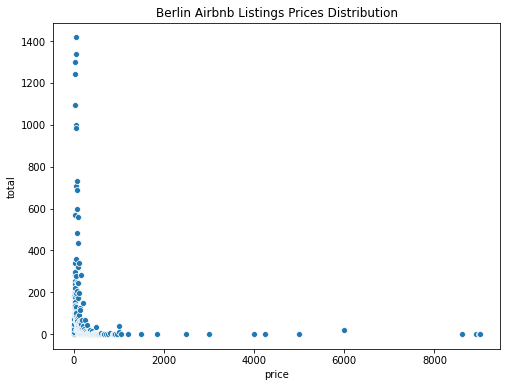

In [138]:
# create price distribution summary
price_dist = listings_data.groupby('price')['id'].count().rename('total').reset_index().sort_values(by='price',ascending=True)

# plot distribution
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot('price','total',data=price_dist,ax=ax)
plt.title("Berlin Airbnb Listings Prices Distribution")
plt.show()


In [148]:
# check listings that cost more than $2500
listings_with_prices_above_2500 = listings_data[listings_data['price']>2500]
print("Total of",listings_with_prices_above_2500.shape[0],"listings which is",
      str(round((listings_with_prices_above_2500.shape[0]/len(listings_data))*100,2))+"% of the dataset")

Total of 29 listings which is 0.12% of the dataset


- This is a small number and we can consider excluding them from the overall data
- I suspect the issue is using comma as a separator instead of dot for decimal values

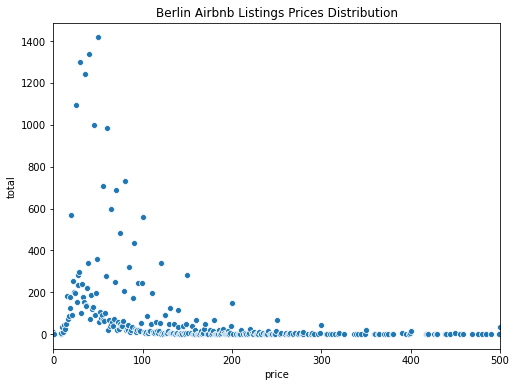

In [154]:
# zoom in apartments that cost $500 or less
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot('price','total',data=price_dist,ax=ax)
plt.xlim(0,500)
plt.title("Berlin Airbnb Listings Prices Distribution")
plt.show()

In [254]:
# calculate distance in km from the city center
from math import radians,cos,sin,asin,sqrt

# define berlin center coordinates
center_lat = 52.521948
center_lon = 13.413698

# define harvesine function
def calculate_distance_from_city_center(df,lat,lon,center_lat,center_lon):
    """
    Calculates the great distance circle between
    two gps coordinates
    """
    # convert decimal degrees to radians
    df['lat1'] = df[lat].apply(lambda x : radians(x))
    df['lon1'] = df[lon].apply(lambda x : radians(x))
    lat2 = radians(center_lat)
    lon2 = radians(center_lon)
    
    # calculate harvesine distance
    df['dlat'] = lat2-df['lat1']
    df['dlon'] = lon2-df['lon1']
    
    df['sin_dlat'] = df['dlat'].apply(lambda x : sin(x/2)**2)
    df['cos_lat1'] = df['lat1'].apply(lambda x : cos(x))
    df['sin_dlon'] = df['dlon'].apply(lambda x : sin(x/2)**2)
    
    df['a'] = df['sin_dlat']+df['cos_lat1']*cos(lat2)*df['sin_dlon']
    df['distance'] = df['a'].apply(lambda x : round(2*asin(sqrt(x))*6371,3))
    
    # drop calculation columns
    df = df.drop(['sin_dlat','sin_dlon','cos_lat1','lat1','lon1','dlat','dlon','a'],axis=1)
    
    return df

# apply function
listings_data = calculate_distance_from_city_center(listings_data,
                                                               'latitude','longitude',center_lat,center_lon)

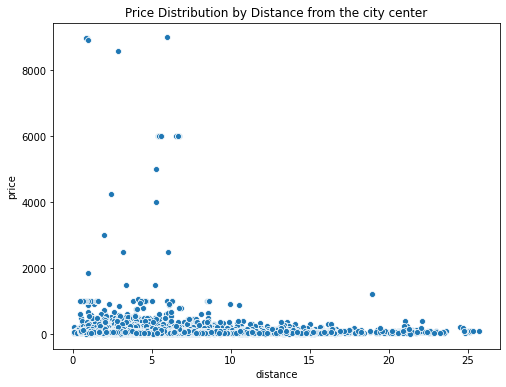

In [258]:
# plot price distribution against distance
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot('distance','price',data=listings_data,ax=ax)
plt.title("Price Distribution by Distance from the city center")
plt.show()

As expected, in general, prices are lower as you move away from the city center

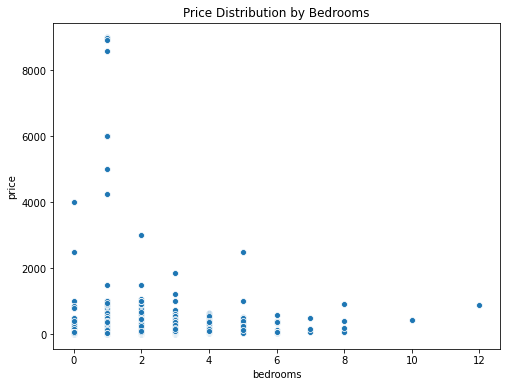

In [264]:
# plot price distribution against number of bedrooms
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot('bedrooms','price',data=listings_data,ax=ax)
plt.title("Price Distribution by Bedrooms")
plt.show()

There are one-bedroom apartments that are quite expensive, but there is no clear linear relationship between prices and the number of bedrooms

In the graph below, we look at apartments that cost less than $2000<br>
It seems cheaper to rent an apartments with more than 4 bedrooms

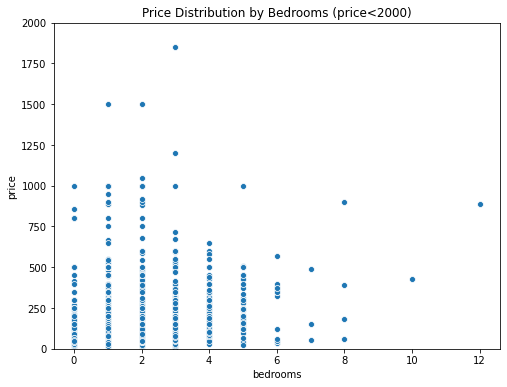

In [268]:
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot('bedrooms','price',data=listings_data,ax=ax)
plt.ylim(0,2000)
plt.title("Price Distribution by Bedrooms (price<$2000)")
plt.show()

In [263]:
# average prices by room type
listings_data.groupby('room_type')['price'].mean().rename('avg_price').reset_index().sort_values(by='avg_price')

,room_type,avg_price
2,Private room,44.333977
3,Shared room,75.364821
0,Entire home/apt,86.796193
1,Hotel room,844.262500


It's cheaper to stay in a private room

In [270]:
# average prices by superhost
listings_data.groupby('host_is_superhost')['price'].mean().rename('avg_price').reset_index().sort_values(by='avg_price')

,host_is_superhost,avg_price
0,f,71.767679
1,t,86.408808


You could save a few dollars by staying with non-superhost!

In [271]:
# how do these prices differ by neighbourhood?
listings_data.groupby('neighbourhood_group_cleansed')['price'].mean().rename('avg_price').reset_index().sort_values(by='avg_price')

,neighbourhood_group_cleansed,avg_price
7,Reinickendorf,47.855457
5,Neukölln,52.111530
11,Treptow - Köpenick,57.405858
2,Lichtenberg,59.630675
3,Marzahn - Hellersdorf,60.833333
9,Steglitz - Zehlendorf,63.404255
8,Spandau,65.730769
1,Friedrichshain-Kreuzberg,66.297839
6,Pankow,71.809205
4,Mitte,87.287994


In [275]:
# we can also check prices by neighbourhood
listings_data.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed'])['price'].mean().rename('avg_price').reset_index().sort_values(by='avg_price')[0:10]

,neighbourhood_group_cleansed,neighbourhood_cleansed,avg_price
35,Lichtenberg,Neu-Hohenschönhausen Süd,22.000000
40,Marzahn - Hellersdorf,Hellersdorf-Süd,30.142857
43,Marzahn - Hellersdorf,Marzahn-Mitte,31.200000
30,Lichtenberg,Friedrichsfelde Süd,31.551020
90,Reinickendorf,West 4,34.857143
58,Neukölln,Gropiusstadt,35.533333
103,Steglitz - Zehlendorf,Lankwitz,36.516129
92,Spandau,Brunsbütteler Damm,37.083333
98,Spandau,Siemensstadt,37.125000
85,Reinickendorf,Ost 1,40.830769
